In [25]:
import numpy as np
import matplotlib.pyplot as plt

# --- User Inputs ---
mean_profit_unhedged = 86.79 / 30   # avg monthly profit split into daily
std_dev_unhedged = 28.05770193 / np.sqrt(30)  # convert monthly std dev to daily

mean_profit_hedged = 86.79 - 8.64  # apply hedge cost
std_dev_hedged = 7.138514888 / np.sqrt(30)

days = 30
simulations = 1000000

# --- Run Monte Carlo Simulation ---
np.random.seed(42)
unhedged_results = []
hedged_results = []

for _ in range(simulations):
    unhedged_day_profits = np.random.normal(mean_profit_unhedged, std_dev_unhedged, days)
    hedged_day_profits = np.random.normal(mean_profit_hedged / days, std_dev_hedged, days)

    unhedged_results.append(np.sum(unhedged_day_profits))
    hedged_results.append(np.sum(hedged_day_profits))

unhedged_results = np.array(unhedged_results)
hedged_results = np.array(hedged_results)

# --- Metrics Function ---
def compute_metrics(results, label):
    mean_val = np.mean(results)
    std_val = np.std(results)
    prob_loss = np.mean(results < 0) * 100
    min_val = np.min(results)
    max_val = np.max(results)
    sharpe = mean_val / std_val
    var_95 = np.percentile(results, 5)
    cvar_95 = results[results <= var_95].mean()

    return {
        "label": label,
        "mean": mean_val,
        "std": std_val,
        "prob_loss": prob_loss,
        "min": min_val,
        "max": max_val,
        "sharpe": sharpe,
        "var_95": var_95,
        "cvar_95": cvar_95,
    }

# --- Calculate Metrics ---
unhedged_metrics = compute_metrics(unhedged_results, "UNHEDGED MINING STRATEGY")
hedged_metrics = compute_metrics(hedged_results, "HEDGED MINING STRATEGY")

# --- Hedging Efficiency ---
hedging_efficiency = 1 - (hedged_metrics['std'] / unhedged_metrics['std'])

# --- Print Results ---
def print_metrics(metrics):
    print(f"{metrics['label']}")
    print(f"Average Monthly Profit: ${metrics['mean']:.2f}/MWh")
    print(f"Standard Deviation:     ${metrics['std']:.2f}")
    print(f"Probability of Loss:    {metrics['prob_loss']:.2f}%")
    print(f"Best Case:              ${metrics['max']:.2f}/MWh")
    print(f"Worst Case:             ${metrics['min']:.2f}/MWh")
    print(f"Sharpe Ratio:           {metrics['sharpe']:.2f}")
    print(f"VaR 95%:                ${metrics['var_95']:.2f}")
    print(f"CVaR 95%:               ${metrics['cvar_95']:.2f}")


print_metrics(unhedged_metrics)
print_metrics(hedged_metrics)
print(f"Hedging Efficiency Index: {hedging_efficiency * 100:.2f}%")


UNHEDGED MINING STRATEGY
Average Monthly Profit: $86.75/MWh
Standard Deviation:     $28.08
Probability of Loss:    0.10%
Best Case:              $216.95/MWh
Worst Case:             $-53.02/MWh
Sharpe Ratio:           3.09
VaR 95%:                $40.55
CVaR 95%:               $28.89
HEDGED MINING STRATEGY
Average Monthly Profit: $78.14/MWh
Standard Deviation:     $7.13
Probability of Loss:    0.00%
Best Case:              $118.67/MWh
Worst Case:             $44.95/MWh
Sharpe Ratio:           10.95
VaR 95%:                $66.39
CVaR 95%:               $63.41
Hedging Efficiency Index: 74.60%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# --- User Inputs ---
mean_profit_unhedged = 111.82 / 31   # avg monthly profit split into daily
std_dev_unhedged = 40.179326 / np.sqrt(31)  # convert monthly std dev to daily

mean_profit_hedged = 111.82 - 10.69  # apply hedge cost
std_dev_hedged = 7.044620673 / np.sqrt(31)

days = 31
simulations = 1000000

# --- Run Monte Carlo Simulation ---
np.random.seed(42)
unhedged_results = []
hedged_results = []

for _ in range(simulations):
    unhedged_day_profits = np.random.normal(mean_profit_unhedged, std_dev_unhedged, days)
    hedged_day_profits = np.random.normal(mean_profit_hedged / days, std_dev_hedged, days)

    unhedged_results.append(np.sum(unhedged_day_profits))
    hedged_results.append(np.sum(hedged_day_profits))

# --- Visualization ---
plt.figure(figsize=(10, 6))
plt.hist(unhedged_results, bins=50, alpha=0.6, label='Unhedged Mining', color='red')
plt.hist(hedged_results, bins=50, alpha=0.6, label='100% Hedged LZEW Mining', color='green')
plt.axvline(np.mean(unhedged_results), color='red', linestyle='--')
plt.axvline(np.mean(hedged_results), color='green', linestyle='--')
plt.title("Monte Carlo Simulation of Monthly Profit – Hedged vs Unhedged - January 2025")
plt.xlabel("Monthly Profit ($/MWh)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Convert to numpy arrays for analysis
unhedged_results = np.array(unhedged_results)
hedged_results = np.array(hedged_results)

# --- Metrics for Unhedged Strategy ---
mean_unhedged = np.mean(unhedged_results)
std_unhedged = np.std(unhedged_results)
prob_loss_unhedged = np.mean(unhedged_results < 0) * 100
min_unhedged = np.min(unhedged_results)
max_unhedged = np.max(unhedged_results)
sharpe_unhedged = mean_unhedged / std_unhedged

# --- Metrics for Hedged Strategy ---
mean_hedged = np.mean(hedged_results)
std_hedged = np.std(hedged_results)
prob_loss_hedged = np.mean(hedged_results < 0) * 100
min_hedged = np.min(hedged_results)
max_hedged = np.max(hedged_results)
sharpe_hedged = mean_hedged / std_hedged

# --- Display the Results ---
print("UNHEDGED MINING STRATEGY")
print(f"Average Monthly Profit: ${mean_unhedged:.2f}/MWh")
print(f"Standard Deviation:     ${std_unhedged:.2f}")
print(f"Probability of Loss:    {prob_loss_unhedged:.2f}%")
print(f"Best Case:              ${max_unhedged:.2f}/MWh")
print(f"Worst Case:             ${min_unhedged:.2f}/MWh")
print(f"Sharpe Ratio:           {sharpe_unhedged:.2f}\n")

print("HEDGED MINING STRATEGY")
print(f"Average Monthly Profit: ${mean_hedged:.2f}/MWh")
print(f"Standard Deviation:     ${std_hedged:.2f}")
print(f"Probability of Loss:    {prob_loss_hedged:.2f}%")
print(f"Best Case:              ${max_hedged:.2f}/MWh")
print(f"Worst Case:             ${min_hedged:.2f}/MWh")
print(f"Sharpe Ratio:           {sharpe_hedged:.2f}")


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis

def run_monte_carlo_simulation(
    month_label,
    days,
    mean_profit_unhedged,
    std_dev_unhedged,
    hedge_cost,
    std_dev_hedged,
    simulations=1_000_000,
    seed=42
):
    np.random.seed(seed)

    # Convert to daily values
    daily_mean_unhedged = mean_profit_unhedged / days
    daily_std_unhedged = std_dev_unhedged / np.sqrt(days)

    daily_mean_hedged = (mean_profit_unhedged - hedge_cost) / days
    daily_std_hedged = std_dev_hedged / np.sqrt(days)

    # Run simulations
    unhedged_results = np.sum(
        np.random.normal(daily_mean_unhedged, daily_std_unhedged, (simulations, days)),
        axis=1
    )
    hedged_results = np.sum(
        np.random.normal(daily_mean_hedged, daily_std_hedged, (simulations, days)),
        axis=1
    )

    # Compute metrics
    def compute_metrics(data):
        mean_val = np.mean(data)
        std_val = np.std(data)
        prob_loss = np.mean(data < 0) * 100
        min_val = np.min(data)
        max_val = np.max(data)
        sharpe = mean_val / std_val
        downside_std = np.std(data[data < mean_val])
        sortino = mean_val / downside_std if downside_std != 0 else np.nan
        var_95 = np.percentile(data, 5)
        cvar_95 = data[data <= var_95].mean()
        skewness = skew(data)
        kurt_val = kurtosis(data, fisher=False)
        omega = (
            np.sum(data[data > 0]) / abs(np.sum(data[data < 0])) if np.sum(data[data < 0]) != 0 else np.nan
        )
        tail_gap = cvar_95 - var_95
    return {
        "mean": mean_val,
        "std": std_val,
        "prob_loss": prob_loss,
        "min": min_val,
        "max": max_val,
        "sharpe": sharpe,
        "sortino": sortino,
        "omega": omega,
        "var_95": var_95,
        "cvar_95": cvar_95,
        "tail_gap": tail_gap,
        "skewness": skewness,
        "kurtosis": kurt_val,
    }


    unhedged_metrics = compute_metrics(unhedged_results)
    hedged_metrics = compute_metrics(hedged_results)

    # Hedging Efficiency
    hedging_efficiency = 1 - (hedged_metrics["std"] / unhedged_metrics["std"])
    hedged_metrics["hedging_efficiency"] = hedging_efficiency * 100

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.hist(unhedged_results, bins=50, alpha=0.6, label='Unhedged Mining', color='steelblue')
    plt.hist(hedged_results, bins=50, alpha=0.6, label='100% Hedged Mining', color='goldenrod')
    plt.axvline(unhedged_metrics["mean"], color='steelblue', linestyle='--', linewidth=1.5)
    plt.axvline(hedged_metrics["mean"], color='goldenrod', linestyle='--', linewidth=1.5)
    plt.title(f"Monte Carlo Simulation of Monthly Profit – {month_label}")
    plt.xlabel("Monthly Profit ($/MWh)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Format results for output
    df = pd.DataFrame([
        {"Strategy": "Unhedged", **unhedged_metrics},
        {"Strategy": "Hedged", **hedged_metrics}
    ])
    return df

# Example usage for January 2025
run_monte_carlo_simulation(
    month_label="January 2025",
    days=31,
    mean_profit_unhedged=111.82,
    std_dev_unhedged=40.179326,
    hedge_cost=10.69,
    std_dev_hedged=7.044620673
)


ModuleNotFoundError: No module named 'scipy'

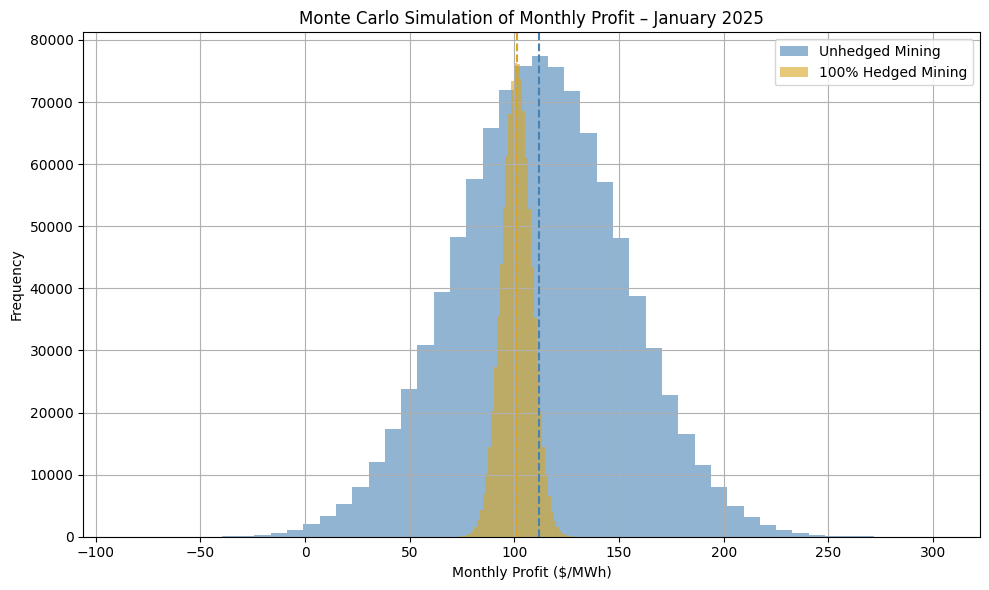

,Strategy,mean,std,prob_loss,min,max,sharpe,sortino,omega,var_95,cvar_95,tail_gap,hedging_efficiency
0,Unhedged,111.811390,40.116928,0.2621,-86.512861,302.968058,2.787137,4.618001,3536.908347,45.710269,29.022174,-16.688095,NaN
1,Hedged,101.110577,7.045697,0.0000,67.228785,135.038405,14.350685,23.796187,NaN,89.522638,86.573030,-2.949608,82.437097


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def run_monte_carlo_simulation(
    month_label,
    days,
    mean_profit_unhedged,
    std_dev_unhedged,
    hedge_cost,
    std_dev_hedged,
    simulations=1_000_000,
    seed=42
):
    np.random.seed(seed)

    # Convert to daily values
    daily_mean_unhedged = mean_profit_unhedged / days
    daily_std_unhedged = std_dev_unhedged / np.sqrt(days)

    daily_mean_hedged = (mean_profit_unhedged - hedge_cost) / days
    daily_std_hedged = std_dev_hedged / np.sqrt(days)

    # Run simulations
    unhedged_results = np.sum(
        np.random.normal(daily_mean_unhedged, daily_std_unhedged, (simulations, days)),
        axis=1
    )
    hedged_results = np.sum(
        np.random.normal(daily_mean_hedged, daily_std_hedged, (simulations, days)),
        axis=1
    )

    # Compute metrics
    def compute_metrics(data):
        mean_val = np.mean(data)
        std_val = np.std(data)
        prob_loss = np.mean(data < 0) * 100
        min_val = np.min(data)
        max_val = np.max(data)
        sharpe = mean_val / std_val
        downside_std = np.std(data[data < mean_val])
        sortino = mean_val / downside_std if downside_std != 0 else np.nan
        var_95 = np.percentile(data, 5)
        cvar_95 = data[data <= var_95].mean()
        
        omega = (
            np.sum(data[data > 0]) / abs(np.sum(data[data < 0])) if np.sum(data[data < 0]) != 0 else np.nan
        )
        tail_gap = cvar_95 - var_95
        return {
            "mean": mean_val,
            "std": std_val,
            "prob_loss": prob_loss,
            "min": min_val,
            "max": max_val,
            "sharpe": sharpe,
            "sortino": sortino,
            "omega": omega,
            "var_95": var_95,
            "cvar_95": cvar_95,
            "tail_gap": tail_gap,
            
        }

    unhedged_metrics = compute_metrics(unhedged_results)
    hedged_metrics = compute_metrics(hedged_results)

    # Hedging Efficiency
    hedging_efficiency = 1 - (hedged_metrics["std"] / unhedged_metrics["std"])
    hedged_metrics["hedging_efficiency"] = hedging_efficiency * 100

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.hist(unhedged_results, bins=50, alpha=0.6, label='Unhedged Mining', color='steelblue')
    plt.hist(hedged_results, bins=50, alpha=0.6, label='100% Hedged Mining', color='goldenrod')
    plt.axvline(unhedged_metrics["mean"], color='steelblue', linestyle='--', linewidth=1.5)
    plt.axvline(hedged_metrics["mean"], color='goldenrod', linestyle='--', linewidth=1.5)
    plt.title(f"Monte Carlo Simulation of Monthly Profit – {month_label}")
    plt.xlabel("Monthly Profit ($/MWh)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Format results for output
    df = pd.DataFrame([
        {"Strategy": "Unhedged", **unhedged_metrics},
        {"Strategy": "Hedged", **hedged_metrics}
    ])
    return df

# Example usage for January 2025
run_monte_carlo_simulation(
    month_label="January 2025",
    days=31,
    mean_profit_unhedged=111.82,
    std_dev_unhedged=40.179326,
    hedge_cost=10.69,
    std_dev_hedged=7.044620673
)


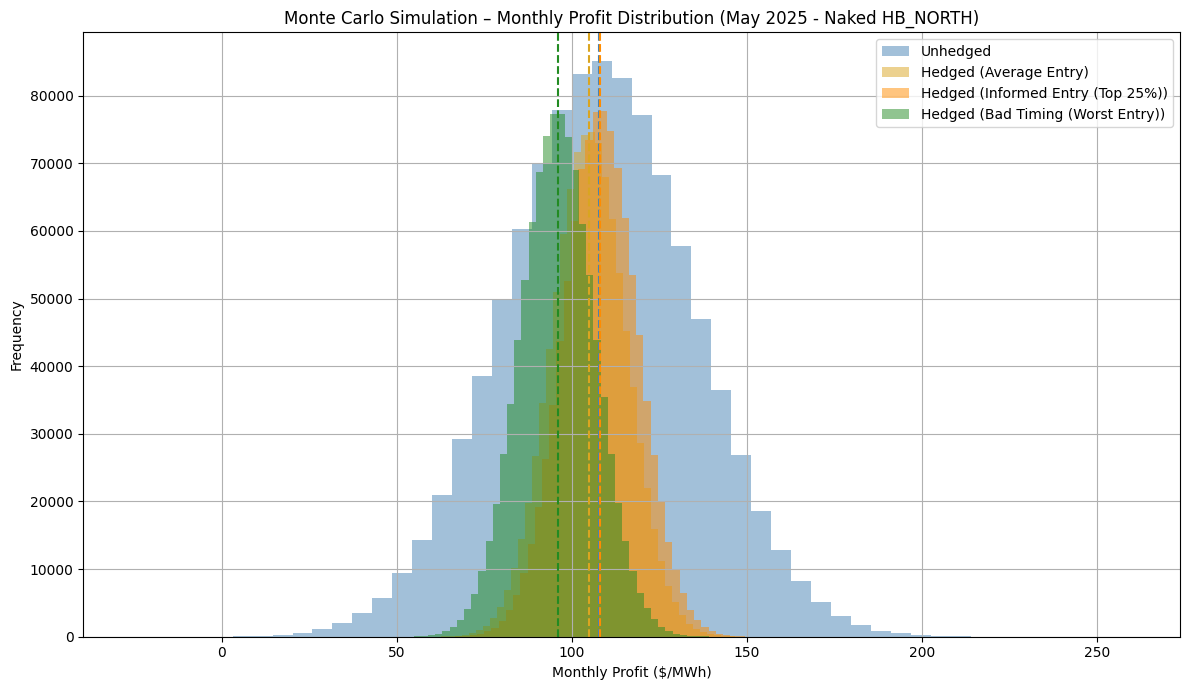


--- Monte Carlo Simulation Results ---

                         Strategy       mean       std  prob_loss        min        max    sharpe   sortino         omega    var_95   cvar_95   tail_gap  hedging_efficiency
                         Unhedged 107.803596 26.700806     0.0018 -25.315028 259.468134  4.037466  6.688662 898265.386285 63.826507 52.687349 -11.139158                 NaN
           Hedged (Average Entry) 104.962693 10.590164     0.0000  58.761820 158.549440  9.911338 16.459259           NaN 87.542975 83.136872  -4.406103           60.337662
Hedged (Informed Entry (Top 25%)) 108.126291 10.575451     0.0000  54.273140 157.671659 10.224273 16.965017           NaN 90.746894 86.303716  -4.443178           60.392766
Hedged (Bad Timing (Worst Entry))  95.947828 10.578310     0.0000  44.529140 147.301678  9.070242 15.033542           NaN 78.566791 74.113947  -4.452844           60.382060


In [38]:
# Re-import required libraries after kernel reset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def run_monte_carlo_simulation_multientry(
    month_label,
    days,
    mean_profit_unhedged,
    std_dev_unhedged,
    hedge_scenarios,
    simulations=1_000_000,
    seed=42
):
    np.random.seed(seed)

    # Convert unhedged to daily
    daily_mean_unhedged = mean_profit_unhedged / days
    daily_std_unhedged = std_dev_unhedged / np.sqrt(days)

    # Simulate unhedged
    unhedged_results = np.sum(
        np.random.normal(daily_mean_unhedged, daily_std_unhedged, (simulations, days)), axis=1
    )

    # Results container
    results = [{
        "Strategy": "Unhedged",
        **compute_metrics(unhedged_results)
    }]

    # Simulate each hedging strategy
    hedged_distributions = {"Unhedged": unhedged_results}
    for label, params in hedge_scenarios.items():
        daily_mean = (mean_profit_unhedged - params["hedge_cost"]) / days
        daily_std = params["std_dev"] / np.sqrt(days)
        hedged_result = np.sum(
            np.random.normal(daily_mean, daily_std, (simulations, days)), axis=1
        )
        metrics = compute_metrics(hedged_result)

        # Hedging Efficiency
        hedging_efficiency = 1 - (metrics["std"] / results[0]["std"])
        metrics["hedging_efficiency"] = hedging_efficiency * 100
        results.append({
            "Strategy": f"Hedged ({label})",
            **metrics
        })
        hedged_distributions[f"Hedged ({label})"] = hedged_result

    # Plotting
    plt.figure(figsize=(12, 7))
    colors = ['steelblue', 'goldenrod', 'darkorange', 'forestgreen']
    for i, (label, data) in enumerate(hedged_distributions.items()):
        plt.hist(data, bins=50, alpha=0.5, label=label, color=colors[i])
        plt.axvline(np.mean(data), color=colors[i], linestyle='--', linewidth=1.5)

    plt.title(f"Monte Carlo Simulation – Monthly Profit Distribution ({month_label})")
    plt.xlabel("Monthly Profit ($/MWh)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Return DataFrame
    df = pd.DataFrame(results)
    return df

# Supporting metric function
def compute_metrics(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    prob_loss = np.mean(data < 0) * 100
    min_val = np.min(data)
    max_val = np.max(data)
    sharpe = mean_val / std_val
    downside_std = np.std(data[data < mean_val])
    sortino = mean_val / downside_std if downside_std != 0 else np.nan
    var_95 = np.percentile(data, 5)
    cvar_95 = data[data <= var_95].mean()
    omega = np.sum(data[data > 0]) / abs(np.sum(data[data < 0])) if np.sum(data[data < 0]) != 0 else np.nan
    tail_gap = cvar_95 - var_95

    return {
        "mean": mean_val,
        "std": std_val,
        "prob_loss": prob_loss,
        "min": min_val,
        "max": max_val,
        "sharpe": sharpe,
        "sortino": sortino,
        "omega": omega,
        "var_95": var_95,
        "cvar_95": cvar_95,
        "tail_gap": tail_gap,
    }

# Example usage
hedge_scenarios = {
    "Average Entry": {"hedge_cost": 2.82, "std_dev": 10.58311893},
    "Informed Entry (Top 25%)": {"hedge_cost": -0.33, "std_dev": 10.58311893},
    "Bad Timing (Worst Entry)": {"hedge_cost": 11.87, "std_dev": 10.58311893}
}

df_results = run_monte_carlo_simulation_multientry(
    month_label="May 2025 - Naked HB_NORTH",
    days=30,
    mean_profit_unhedged=107.810630376344,
    std_dev_unhedged=26.71589926,
    hedge_scenarios=hedge_scenarios
)

# Display the metrics table
print("\n--- Monte Carlo Simulation Results ---\n")
print(df_results.to_string(index=False))
